In [1]:
%load_ext autoreload
%autoreload 2



In [2]:



from PIL import Image, ImageChops, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy as sp

from src import Background, gkern, bbox_iou
from random import shuffle
import time



%matplotlib inline

In [3]:
# Loading list of images

backgrounds = os.listdir('Backgrounds/')
shuffle(backgrounds)
faces = os.listdir('cropped/')

num_back = len(backgrounds)
num_faces = len(faces)

0


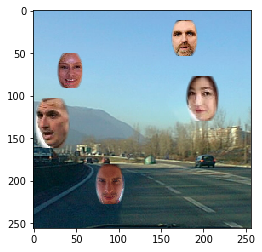

In [26]:
back = backgrounds[np.random.randint(0,len(backgrounds))]
test_bg = Background('Backgrounds/'+back)
test_bg.overlap_threshold  = 0
tweaker = 1
weights = (tweaker*2,tweaker*2.5)
print(test_bg.overlap_threshold)
no_faces = 5
faces_rand = np.random.randint(num_faces, size=(no_faces))

for face in faces_rand:
#     print(face)
#     test_bg.place_face('cropped/' + faces[face], blur=False, kernal_weights = weights)
    test_bg.place_face('cropped/' + faces[face], blur=True, kernal_weights = weights)

test_bg.show()

(119, 159)
(18921, 3)
-1.415943901303612


/home/elisa_catherine3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater_equal


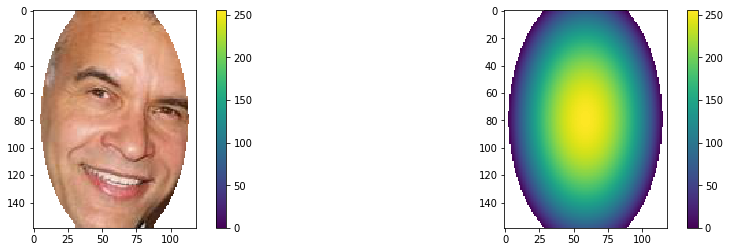

In [43]:
tweaker = 1

test_face = Image.open('cropped/' + faces[49])

x = gkern(test_face.size[1],test_face.size[0],2.0*tweaker,2.5*tweaker);

data = np.array(test_face.getdata())
blank_img = Image.fromarray(np.ones(test_face.size[::-1] + tuple([3]), dtype = np.uint8)*255)

print(test_face.size)
print(data.shape)


x = x/np.max(x)
th = (np.mean(x) - 1*np.std(x)) 
x[x < th] = np.nan


# data[...,3] = x

# x_ = np.exp(x)
x_ = np.log(x)
print(np.nanmin(x_))
x_ = x_ - np.nanmin(x_)

# x_[x_ < (np.log(th)-np.min(x_))] = 0
# x_ = 1.3**x_
x_ = x_/np.nanmax(x_)
x_ = x_*255

x[x >= th] = 255
# x = x*255

x_img = Image.fromarray(np.uint8(x))

x_img = x_img.filter(ImageFilter.MinFilter(5))

blank_img.paste(test_face, (0,0), x_img)


plt.subplot(1,2,1)
plt.imshow(blank_img)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(x_)
plt.colorbar()

plt.subplots_adjust(left = 28, right = 30)

In [7]:
np.nan==255

False

In [47]:
for i in range(5):
    print(test_bg.face_boxes[i].xmin, test_bg.face_boxes[i].ymin)
    
print(bbox_iou(test_bg.face_boxes[0], test_bg.face_boxes[2]))

129 194
21 185
165 59
116 101
70 24
[0.]


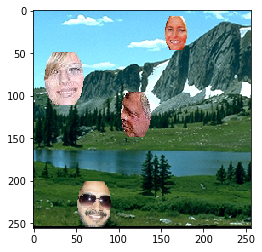

In [51]:
count = 0

for back in backgrounds:
    bg = Background('Backgrounds/'+back)
    bg.overlap_threshold = 0
    no_faces = np.random.randint(1, 6)
    faces_rand = np.random.randint(num_faces, size=(no_faces))
    for face in faces_rand:
        bg.place_face('cropped/'+faces[face])   
        bg.show()
    bg.save('output/')
    count = count+1
#     print(count)


/home/elisa_catherine3/Documents/floating_head_generation/src/my_utils.py:148: RuntimeWarning: invalid value encountered in greater
  mask[mask>255] = 255


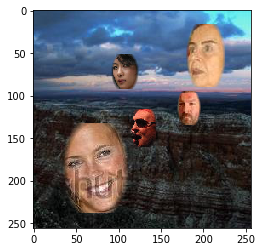

In [28]:
count = 0
tweaker = 1
weights = (tweaker*2,tweaker*2.5)

for back in backgrounds:
    bg = Background('Backgrounds/'+back)
    bg.overlap_threshold = 0
    no_faces = np.random.randint(1, 6)
    faces_rand = np.random.randint(num_faces, size=(no_faces))
    for face in faces_rand:
        bg.place_face('cropped/'+faces[face] , blur=True, kernal_weights = weights)   
        bg.show()
    bg.save('output_blurred/')
    count = count+1
#     print(count)


In [118]:
th

0.004029979961299612

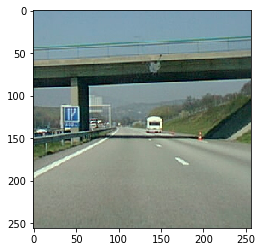

In [180]:
plt.imshow(back_img)

In [7]:
np.random.randint(1,6)

2

In [37]:
data = FaceVAE(image_paths_file='data/crop_list.txt')
lollita_img = Image.open('./data/test/n005233/0046_02_crop.jpg')


In [ ]:
mask = np.load('./data/face_placed_gnd/0000047_4_gnd.npy')
pic = Image.open('./data/face_placed/0000047_4.png')
fig, ax = plt.subplots(1, 2)
ax[0].imshow(mask)
ax[1].imshow(pic)

In [15]:
placed = []
with open('./data/face_placed/face_placed_list.txt') as f:
    for line in f:
        filename = line.strip()
        placed.append(filename)

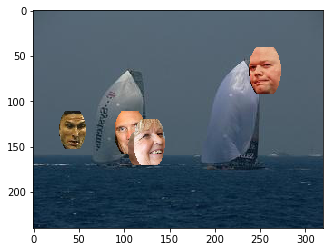

In [22]:
img = Image.open('./data/face_placed/' + placed[10000])
plt.imshow(img)